In [197]:
# 挖掘空间结构的motifs特征
import pandas as pd 
import os

import warnings
warnings.filterwarnings('ignore')

In [198]:
pwd = os.getcwd()

In [199]:
import networkx as nx

all_graphs = {}

# 将节点之间方向相同的边进行合并，权值为边的数量与边的值和
node_graphs = {}

node_features = pd.DataFrame()

for filename in os.listdir(pwd + '/钓鱼一阶节点'):
    if filename.endswith('.csv'):
        data = pd.read_csv(pwd + '/钓鱼一阶节点/' + filename)
        # 构建一阶交易图，两个节点之间存在多条边
        G = nx.MultiDiGraph()
        for i in range(len(data)):
            G.add_edge(data['From'][i], data['To'][i], value = data['Value'][i], timestamp = data['TimeStamp'][i])
        
        # 将节点之间方向相同的边进行合并，权值为边的数量与边的值和
        G1 = nx.DiGraph()
        # 将data按照From和To分组，然后对每个分组进行遍历，将value相加
        for name, group in data.groupby(['From', 'To']):
            G1.add_edge(name[0], name[1], value = group['Value'].sum(), timestamp = group['TimeStamp'].max(), count = len(group))
        
        # 计算节点特征
        features = {}
        features['address'] = filename.split('.')[0]
        features['in_degree'] = len(G.in_degree())
        features['out_degree'] = len(G.out_degree())
        features['max_timestamp'] = data['TimeStamp'].max()
        features['min_timestamp'] = data['TimeStamp'].min()
        features['value_out'] = data[data['From'] == filename.split('.')[0]]['Value'].sum()
        features['value_in'] = data[data['To'] == filename.split('.')[0]]['Value'].sum()
        features['balance'] = features['value_out'] - features['value_in']
        features['count'] = len(data)
        features['label'] = 0

        # 将节点特征添加到node_features中
        node_features = node_features.append(features, ignore_index = True)

        all_graphs[filename.split('.')[0]] = G
        node_graphs[filename.split('.')[0]] = G1

C:\Users\YangXikang\AppData\Local\Temp\ipykernel_3272\4196666915.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  node_features = node_features.append(features, ignore_index = True)
C:\Users\YangXikang\AppData\Local\Temp\ipykernel_3272\4196666915.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  node_features = node_features.append(features, ignore_index = True)
C:\Users\YangXikang\AppData\Local\Temp\ipykernel_3272\4196666915.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  node_features = node_features.append(features, ignore_index = True)
C:\Users\YangXikang\AppData\Local\Temp\ipykernel_3272\4196666915.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

In [200]:
for filename in os.listdir(pwd + '/非钓鱼一阶节点'):
    if filename.endswith('.csv'):
        data = pd.read_csv(pwd + '/非钓鱼一阶节点/' + filename)
        # 构建一阶交易图，两个节点之间存在多条边
        G = nx.MultiDiGraph()
        for i in range(len(data)):
            G.add_edge(data['From'][i], data['To'][i], value = data['Value'][i], timestamp = data['TimeStamp'][i])
        
        # 将节点之间方向相同的边进行合并，权值为边的数量与边的值和
        G1 = nx.DiGraph()
        # 将data按照From和To分组，然后对每个分组进行遍历，将value相加
        for name, group in data.groupby(['From', 'To']):
            G1.add_edge(name[0], name[1], value = group['Value'].sum(), timestamp = group['TimeStamp'].max(), count = len(group))

        
        # 计算节点特征
        features = {}
        features['address'] = filename.split('.')[0]
        features['in_degree'] = len(G.in_degree())
        features['out_degree'] = len(G.out_degree())
        features['max_timestamp'] = data['TimeStamp'].max()
        features['min_timestamp'] = data['TimeStamp'].min()
        features['value_out'] = data[data['From'] == filename.split('.')[0]]['Value'].sum()
        features['value_in'] = data[data['To'] == filename.split('.')[0]]['Value'].sum()
        features['balance'] = features['value_out'] - features['value_in']
        features['count'] = len(data)
        features['label'] = 1

        # 将节点特征添加到node_features中
        node_features = node_features.append(features, ignore_index = True)

        all_graphs[filename.split('.')[0]] = G
        node_graphs[filename.split('.')[0]] = G1

C:\Users\YangXikang\AppData\Local\Temp\ipykernel_3272\2750678660.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  node_features = node_features.append(features, ignore_index = True)
C:\Users\YangXikang\AppData\Local\Temp\ipykernel_3272\2750678660.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  node_features = node_features.append(features, ignore_index = True)
C:\Users\YangXikang\AppData\Local\Temp\ipykernel_3272\2750678660.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  node_features = node_features.append(features, ignore_index = True)
C:\Users\YangXikang\AppData\Local\Temp\ipykernel_3272\2750678660.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

In [201]:
# 输出node_features
node_features.head()

,address,in_degree,out_degree,max_timestamp,min_timestamp,value_out,value_in,balance,count,label
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,4,4,1527595105,1527017753,1.532693,1.533785,-0.001092,4,0
1,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,5,5,1529893144,1529873859,1.317896,1.318820,-0.000924,5,0
2,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,93,93,1521405323,1517019863,38.133767,37.556046,0.577721,101,0
3,0x0061fb5485dff4bb85c078dca80d19119224d97e,12,12,1527854930,1526900270,1.000000,5.045869,-4.045869,12,0
4,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,4,4,1546665655,1539570132,0.679300,0.680000,-0.000700,3,0


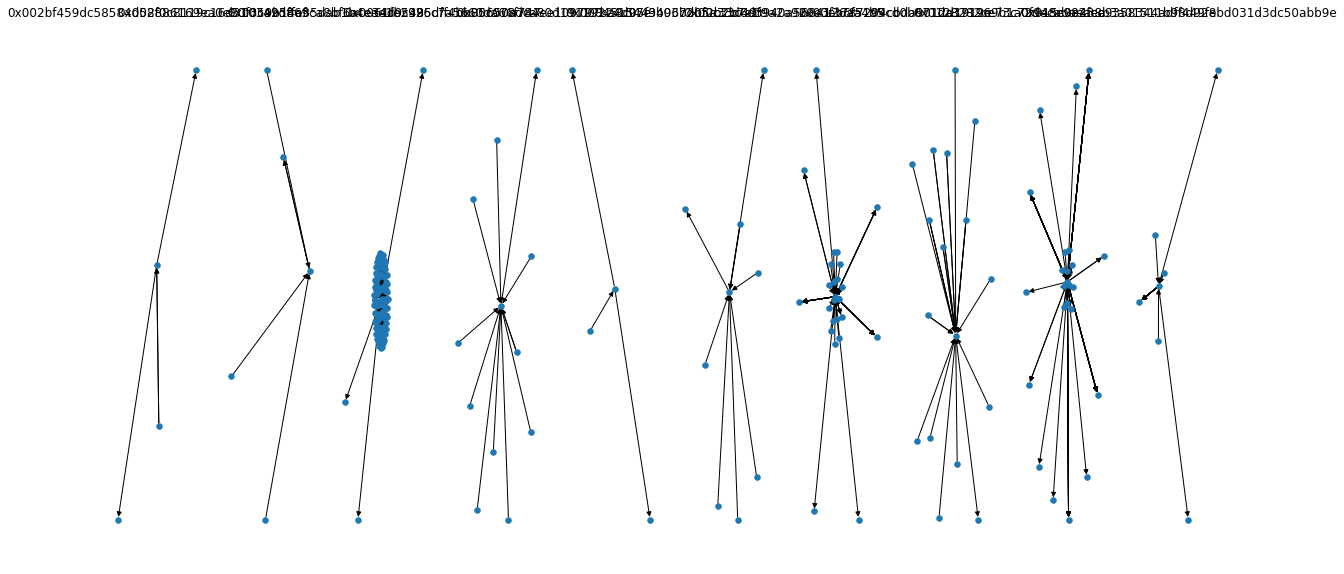

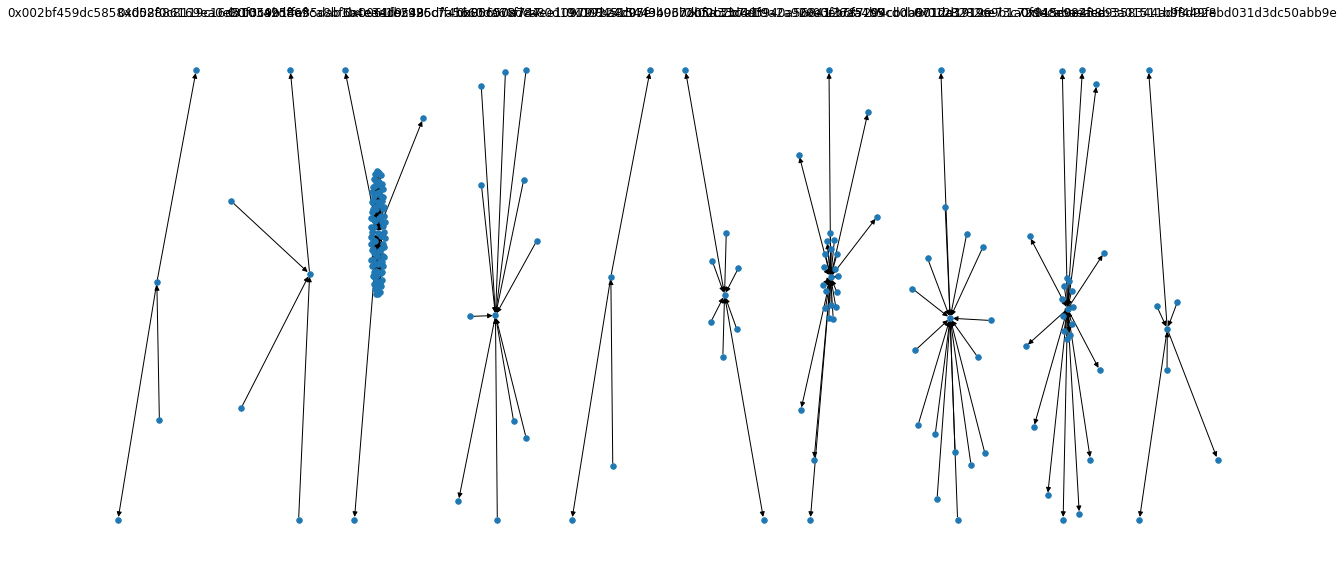

In [202]:
# 将all_graphs与node_graphs进行画图比较， 共话20，每个类10个，分为两行

# 画图
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for i, key in enumerate(all_graphs.keys()):
    if i >= 10:
        break
    plt.subplot(1, 10, i + 1)
    nx.draw(all_graphs[key], with_labels=False, node_size=30, width=1)
    plt.title(key)

plt.figure(figsize=(20, 10))
for i, key in enumerate(node_graphs.keys()):
    if i >= 10:
        break
    plt.subplot(1, 10, i + 1)
    nx.draw(node_graphs[key], with_labels=False, node_size=30, width=1)
    plt.title(key)

plt.show()

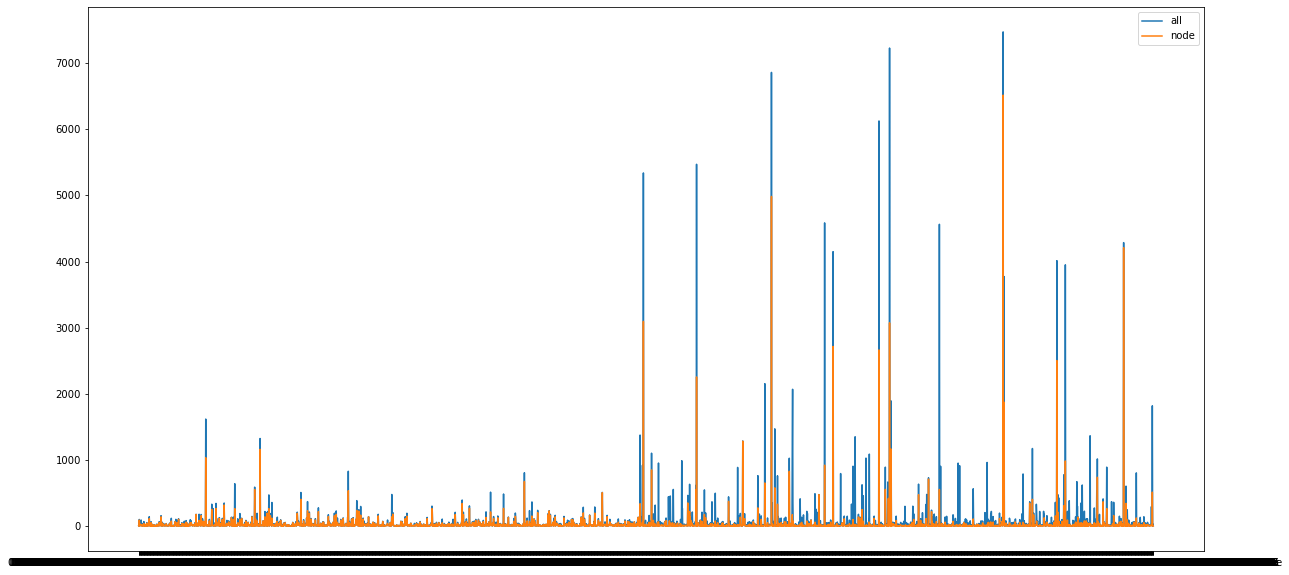

In [203]:
# 画图比较两个图的边的数量

# 将边的数量转化为df
edge_num = []
for key in all_graphs.keys():
    item = {}
    item['all'] = len(all_graphs[key].edges)
    item['node'] = len(node_graphs[key].edges)

    edge_num.append(item)

edge_num = pd.DataFrame(edge_num)
edge_num.index = all_graphs.keys()

# 折线图
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(edge_num['all'], label='all')
plt.plot(edge_num['node'], label='node')

plt.legend()
plt.show()


In [204]:
# 带重启的随机游走，有概率返回到起点，有概率继续游走, 当游走到终点时，返回到起点, 可以反向游走
import random

def random_walk(G, start, walk_length, restart_prob):
    walk = [start]
    while len(walk) < walk_length:
        cur = walk[-1]
        if random.random() < restart_prob:
            walk.append(random.choice(list(G.nodes())))
        else:
            if len(list(G.neighbors(cur))) == 0:
                walk.append(random.choice(list(G.nodes())))
            else:
                walk.append(random.choice(list(G.neighbors(cur))))

    # 获取游走子图
    subgraph = G.subgraph(walk)
    return subgraph

# 生成游走子图
def generate_walks(G, num_walks, walk_length, restart_prob):
    walks = []
    nodes = list(G.nodes())

    while len(walks) < num_walks:
        random.shuffle(nodes)
        random_start_node = random.choice(nodes)
        graph = random_walk(G, random_start_node, walk_length, restart_prob)
        # 是否为存在孤立节点的子图
        if len(list(nx.isolates(graph))) == 0:
            walks.append(graph)
            
    return walks


In [205]:
motifs = {
    'motif1': nx.DiGraph([(0, 1), (1, 2)]),
    'motif2': nx.DiGraph([(0, 1), (2, 1)]),
    'motif3': nx.DiGraph([(0, 1), (0, 2)]),
    # 'motif4': nx.DiGraph([(0, 1), (1, 2), (2, 0)]),
}

# 提取motifs特征
motif_features = {}

# 从node_graphs中提取motifs特征, 统计motifs的数量
import pyfpgrowth

for key in node_graphs.keys():
    print("Process: {}".format(key))
    # 提取motifs特征
    motif_features[key] = {}
    for motif in motifs.keys():
        motif_features[key][motif] = 0
        if motif == 'motif1':
            motif_features[key][motif + '_00'] = 0
            motif_features[key][motif + '_01'] = 0
            motif_features[key][motif + '_10'] = 0
            motif_features[key][motif + '_11'] = 0
            
    node_subgraph = node_graphs[key]

    # 找出sub_graph中所有匹配motifs的结构， 并统计数量
    # 随机游走获取子图
    walks = generate_walks(node_graphs[key], 5, 30, 0.8)

    sub_graph = node_graphs[key]
    
    for walk in walks:
        for motif in motifs:
            for subgraph in nx.algorithms.isomorphism.GraphMatcher(walk, motifs[motif]).subgraph_isomorphisms_iter():
                motif_features[key][motif] += 1
                # 仅对motif1进行再计算, 引入边权
                if motif == 'motif1':
                    # 获取node_subgraph中的边权
                    edges = list(subgraph.keys())
                    value1 = node_subgraph.edges[edges[0], edges[1]]['value']
                    value2 = node_subgraph.edges[edges[1], edges[2]]['value']
                    timestamp1 = node_subgraph.edges[edges[0], edges[1]]['timestamp']
                    timestamp2 = node_subgraph.edges[edges[1], edges[2]]['timestamp']

                    if value1 < value2 and timestamp1 < timestamp2:
                        motif_features[key][motif + '_00'] += 1
                    elif value1 < value2 and timestamp1 > timestamp2:
                        motif_features[key][motif + '_01'] += 1
                    elif value1 > value2 and timestamp1 < timestamp2:
                        motif_features[key][motif + '_10'] += 1 
                    elif value1 > value2 and timestamp1 > timestamp2:
                        motif_features[key][motif + '_11'] += 1

# 将motif_features转化为df
motif_features = pd.DataFrame(motif_features)
motif_features = motif_features.T

motif_features

Process: 0x002bf459dc58584d58886169ea0e80f3ca95ffaf
Process: 0x002f0c8119c16d310342d869ca8bf6ace34d9c39
Process: 0x0059b14e35dab1b4eee1e2926c7a5660da66f747
Process: 0x0061fb5485dff4bb85c078dca80d19119224d97e
Process: 0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c
Process: 0x0084515449b037205a33d6d3940a5684126aa4b5
Process: 0x00c33c49f9a2a920e3f3787204cbda9012d1912e
Process: 0x00eb6f5199cd0b671da371969b1a0f948e982fea
Process: 0x0128282ce73c72decabaeace9358344adff449fe
Process: 0x015c0e438b3a01511b98d928bd031d3dc50abb9e
Process: 0x015fca1d09287823e634ae51237ee1eeff03d9d5
Process: 0x0167409e6106ec3e3f05a09fcf04606918d21ad5
Process: 0x0177eb92b752fa0715ee0dce1d860eaf739b5cf4
Process: 0x017f86b90a46d8fd999eaefda1339355b98da12f
Process: 0x018f2f4b3c9e38607aa7ab4dea23e9d663e3e050
Process: 0x020b1573f2ca670190d33ca2f0a57b0c0399ad37
Process: 0x024c344da7208e60356378a252dab771c34be111
Process: 0x026e78f168df546aabb2733b37920c55b335be80
Process: 0x0275a8960fcb1235b095cb9f40edcae031eae5fd
Process: 0x0

,motif1,motif1_00,motif1_01,motif1_10,motif1_11,motif2,motif3,motif4
0x002bf459dc58584d58886169ea0e80f3ca95ffaf,10,0,0,5,5,0,10,0
0x002f0c8119c16d310342d869ca8bf6ace34d9c39,15,15,0,0,0,30,0,0
0x0059b14e35dab1b4eee1e2926c7a5660da66f747,141,108,26,3,4,2036,8,0
0x0061fb5485dff4bb85c078dca80d19119224d97e,27,19,5,0,3,364,0,0
0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,10,0,0,10,0,0,10,0
...,...,...,...,...,...,...,...,...
0xffbdd48a8ed97337e17d2584015081a9b538285e,0,0,0,0,0,850,0,0
0xffd6b9bc7e6aa15fff8033d5a19ed387de31f379,99,98,1,0,0,2862,0,0
0xffdd24e8a54a7da89bbecdcf9eeae92c93471456,0,0,0,0,0,0,0,0
0xfff547625741e87836166ebc69182e164f3a10fa,0,0,0,0,0,0,0,0


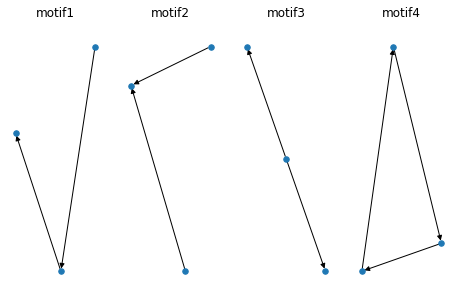

In [206]:
# 画motifs, 每行5
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i, key in enumerate(motifs.keys()):
    plt.subplot(1, 5, i + 1)
    nx.draw(motifs[key], with_labels=False, node_size=30, width=1)
    plt.title(key)

In [207]:
# 将index转化为列， 并将index重命名为address
motif_features = motif_features.reset_index()
motif_features = motif_features.rename(columns={'index': 'address'})

motif_features.describe()

,motif1,motif1_00,motif1_01,motif1_10,motif1_11,motif2,motif3,motif4
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.0
mean,71.126190,28.924405,9.093750,20.875595,11.877679,278.624405,89.803571,0.0
std,111.547034,44.971192,25.280077,43.259610,34.457445,520.681105,261.985761,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,25.000000,10.000000,0.000000,5.000000,0.000000,30.000000,0.000000,0.0
75%,85.250000,43.000000,5.000000,21.000000,5.000000,294.000000,40.500000,0.0
max,894.000000,425.000000,409.000000,536.000000,393.000000,3214.000000,3158.000000,0.0


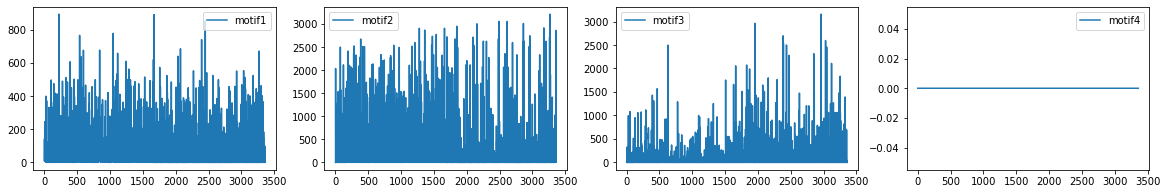

In [208]:
# 画图
# 画motif1、motif2、motif3、motif4的折线图, 画4个子图

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.subplot(1, 4, 1)
plt.plot(motif_features['motif1'], label='motif1')
plt.legend()

plt.subplot(1, 4, 2)
plt.plot(motif_features['motif2'], label='motif2')
plt.legend()

plt.subplot(1, 4, 3)
plt.plot(motif_features['motif3'], label='motif3')
plt.legend()

plt.subplot(1, 4, 4)
plt.plot(motif_features['motif4'], label='motif4')
plt.legend()

plt.show()

In [209]:
# 计算每种motif占所有motif的比例
motif_features['motif1_ratio'] = motif_features['motif1'] / (motif_features['motif1'] + motif_features['motif2'] + motif_features['motif3'] + motif_features['motif4'])
motif_features['motif2_ratio'] = motif_features['motif2'] / (motif_features['motif1'] + motif_features['motif2'] + motif_features['motif3'] + motif_features['motif4'])
motif_features['motif3_ratio'] = motif_features['motif3'] / (motif_features['motif1'] + motif_features['motif2'] + motif_features['motif3'] + motif_features['motif4'])
motif_features['motif4_ratio'] = motif_features['motif4'] / (motif_features['motif1'] + motif_features['motif2'] + motif_features['motif3'] + motif_features['motif4'])

In [ ]:
# 画图
# 画motif1_ratio、motif2_ratio、motif3_ratio、motif4_ratio直方图, 画4个子图

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.subplot(1, 4, 1)
plt.hist(motif_features['motif1_ratio'][:1660], bins=20)
plt.title('motif1_ratio')

plt.subplot(1, 4, 2)
plt.hist(motif_features['motif2_ratio'][:1660], bins=20)
plt.title('motif2_ratio')

plt.subplot(1, 4, 3)
plt.hist(motif_features['motif3_ratio'][:1660], bins=20)
plt.title('motif3_ratio')

plt.subplot(1, 4, 4)
plt.hist(motif_features['motif4_ratio'][:1660], bins=20)
plt.title('motif4_ratio')


plt.show()

In [ ]:
# 画图
# 画motif1_ratio、motif2_ratio、motif3_ratio、motif4_ratio直方图, 画4个子图

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.subplot(1, 4, 1)
plt.hist(motif_features['motif1_ratio'][-1660:], bins=20)
plt.title('motif1_ratio')

plt.subplot(1, 4, 2)
plt.hist(motif_features['motif2_ratio'][-1660:], bins=20)
plt.title('motif2_ratio')

plt.subplot(1, 4, 3)
plt.hist(motif_features['motif3_ratio'][-1660:], bins=20)
plt.title('motif3_ratio')

plt.subplot(1, 4, 4)
plt.hist(motif_features['motif4_ratio'][-1660:], bins=20)
plt.title('motif4_ratio')


plt.show()

In [ ]:
motif_features.fillna(0, inplace=True)

In [ ]:
motif_features

In [ ]:
node_features

In [ ]:
# 将node_features和motif_features合并
featuresX = pd.merge(node_features, motif_features, on='address', how='left')

In [ ]:
featuresX

In [ ]:
# 计算motif1_00, motif1_01, motif1_10, motif1_11的比例
featuresX['motif1_00_ratio'] = featuresX['motif1_00'] / (featuresX['motif1_00'] + featuresX['motif1_01'] + featuresX['motif1_10'] + featuresX['motif1_11'])
featuresX['motif1_01_ratio'] = featuresX['motif1_01'] / (featuresX['motif1_00'] + featuresX['motif1_01'] + featuresX['motif1_10'] + featuresX['motif1_11'])
featuresX['motif1_10_ratio'] = featuresX['motif1_10'] / (featuresX['motif1_00'] + featuresX['motif1_01'] + featuresX['motif1_10'] + featuresX['motif1_11'])
featuresX['motif1_11_ratio'] = featuresX['motif1_11'] / (featuresX['motif1_00'] + featuresX['motif1_01'] + featuresX['motif1_10'] + featuresX['motif1_11'])

In [ ]:
featuresX.fillna(0, inplace=True)
featuresX

In [ ]:
# 数据划分
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# xgb
import xgboost as xgb
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# svm
from sklearn import svm
# 神经网络
from sklearn.neural_network import MLPClassifier
# 逻辑回归
from sklearn.linear_model import LogisticRegression
# 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB
# 隔离森林
from sklearn.ensemble import IsolationForest
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 决策树
from sklearn.tree import DecisionTreeClassifier
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# GBDT
from sklearn.ensemble import GradientBoostingClassifier
# lightGBM
import lightgbm as lgb


In [ ]:
node_features_columns = ['in_degree', 'out_degree', 'max_timestamp', 'min_timestamp', 'value_out', 'value_in', 'balance', 'count']
node_features_columns = ['balance', 'count']


# 使用node_features_columns中的特征
trainX, testX, trainY, testY = train_test_split(featuresX[node_features_columns], featuresX['label'], test_size=0.3, random_state=0)

# 训练模型
clf = xgb.XGBClassifier()
clf.fit(trainX, trainY)

# 预测
pred = clf.predict(testX)

# 评估
print(classification_report(testY, pred))

In [ ]:
motif_features_columns = ['motif1_ratio', 'motif2_ratio', 'motif3_ratio', 'motif1_00_ratio', 'motif1_01_ratio', 'motif1_10_ratio', 'motif1_11_ratio']
# motif_features_columns = ['motif1', 'motif2', 'motif3']

# 使用motif_features_columns中的特征
trainX, testX, trainY, testY = train_test_split(featuresX[motif_features_columns], featuresX['label'], test_size=0.3, random_state=0)

# 训练模型
clf = xgb.XGBClassifier()
clf.fit(trainX, trainY)

# 预测
pred = clf.predict(testX)

# 评估
print(classification_report(testY, pred))


In [219]:
# 使用node_features_columns和motif_features_columns中的特征
merged_columns = node_features_columns + motif_features_columns
print(merged_columns)

trainX, testX, trainY, testY = train_test_split(featuresX[merged_columns], featuresX['label'], test_size=0.3, random_state=0)

# 训练模型
clf = xgb.XGBClassifier()
clf.fit(trainX, trainY)

# 预测
pred = clf.predict(testX)

# 评估
print(classification_report(testY, pred))

['balance', 'count', 'motif1_ratio', 'motif2_ratio', 'motif3_ratio', 'motif1_00_ratio', 'motif1_01_ratio', 'motif1_10_ratio', 'motif1_11_ratio']
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       515
           1       0.94      0.85      0.89       493

    accuracy                           0.90      1008
   macro avg       0.90      0.90      0.90      1008
weighted avg       0.90      0.90      0.90      1008



In [ ]:
# 保存特征
featuresX.to_csv('featuresX.csv', index=False)

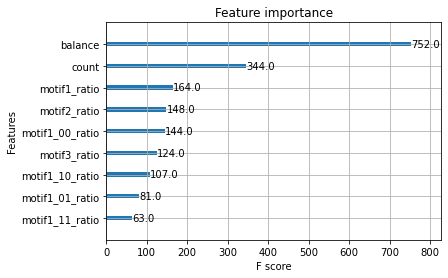

In [220]:
# 计算特征重要性
from xgboost import plot_importance

plot_importance(clf)
plt.show()